## Practical Work 1

For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and any library you will need

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read RegData csv file into numpy array 

In [124]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [125]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

In [106]:
data.shape

(13, 2)

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [107]:
X,Y=data[:,0],data[:,1]

#### Explore your data

In [9]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [10]:
Y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

In [5]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [6]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

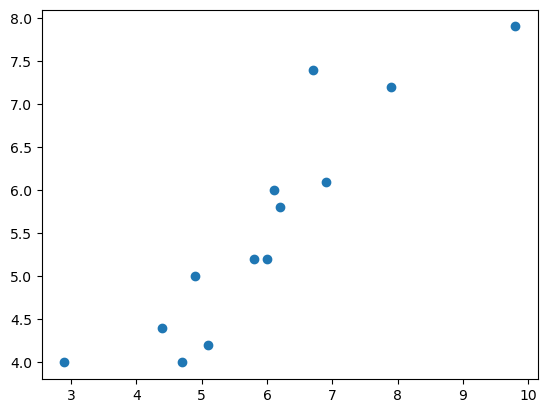

In [12]:
plt.scatter(X,Y)

Text(0, 0.5, 'y')

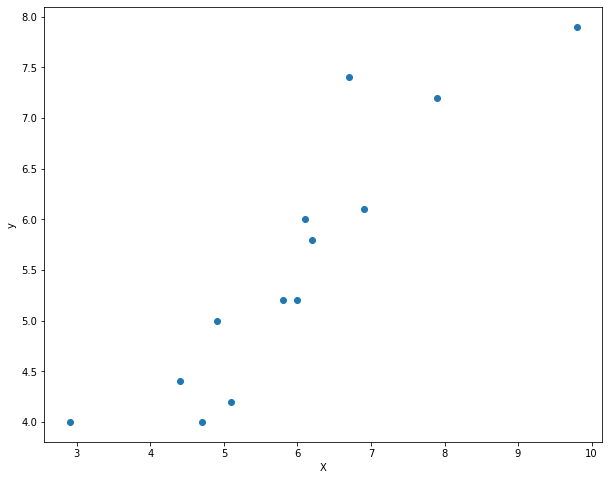

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with zeros. Also choose the Learning rate.

In [43]:
theta_0,theta_1=0,0
lr=.0001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.

In [17]:
h_x=theta_0+theta_1*X

In [18]:
h_x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> use norm square of the error vector.

In [34]:
error_vector=h_x-Y
j=np.linalg.norm(error_vector)**2/(2*error_vector.shape[0])

In [35]:
error_vector.shape[0]

13

In [36]:
print("error_vector",error_vector)
print("j",j)

error_vector [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j 16.305384479692314


Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692318


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [38]:
d_theta_0=error_vector.sum()/error_vector.shape[0]
d_theta_1=(error_vector*X).sum()/error_vector.shape[0]

In [39]:
print("d_theta_0",d_theta_0)
print("d_theta_1",d_theta_1)

d_theta_0 -5.56923073976923
d_theta_1 -35.043846043215375


d_theta_0 : -5.56923073976923
d_theta_1 : -35.04384604321538


### Step5: Update the parameters.

In [45]:
theta_0_new=theta_0-lr*d_theta_0
theta_1_new=theta_1-lr*d_theta_1

In [46]:
print("theta_0_new",theta_0_new)
print("theta_0_new",theta_1_new)

d_theta_0 0.0005569230739769231
d_theta_1 0.003504384604321538


theta_0_new : 0.0005569230739769231
theta_1_new : 0.0035043846043215383


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [126]:
number_of_iteration=1000
theta_0_new=0
theta_1_new=0
lr=.01
for i in range(number_of_iteration):
    print(f'****************** Iteration {i} ******************** \n\n')
    h_x=theta_0_new+theta_1_new*X
    error_vector=h_x-Y
    j=np.linalg.norm(error_vector)**2/(2*error_vector.shape[0])
    print("error_vector",error_vector)
    print("j",j)
    d_theta_0=error_vector.sum()/error_vector.shape[0]
    d_theta_1=(error_vector*X).sum()/error_vector.shape[0]
    print("d_theta_0",theta_0_new)
    print("d_theta_1",theta_1_new)
    gradient_vector=np.array([d_theta_0,d_theta_1])
    print("Gradient Vector Norm:",np.linalg.norm(gradient_vector))
    if np.linalg.norm(gradient_vector)<0.01:
        print("break as gradient vector is almost 0")
        break
    theta_0_new=theta_0_new-lr*d_theta_0
    theta_1_new=theta_1_new-lr*d_theta_1
    
    print("theta_0_new",theta_0_new)
    print("theta_0_new",theta_1_new)
    
    
    

****************** Iteration 0 ******************** 


error_vector [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j 16.305384479692314
d_theta_0 0
d_theta_1 0
Gradient Vector Norm: 35.483622652335995
theta_0_new 0.0556923073976923
theta_0_new 0.35043846043215376
****************** Iteration 1 ******************** 


error_vector [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]
j 6.175608808043304
d_theta_0 0.0556923073976923
d_theta_1 0.35043846043215376
Gradient Vector Norm: 21.611905283072655
theta_0_new 0.08996312489803082
theta_0_new 0.5638229867322322
****************** Iteration 2 ******************** 


error_vector [-2.27495016 -3.53242307 -2.14730419 -2.65583504 -2.28457159 -2.11965812
 -2.47071671 -2.21433466 -1.72709876 -1.23453951 -1.26006895 -1.82921577


theta_0_new 0.38939995643301634
theta_0_new 0.8578123156363526
****************** Iteration 308 ******************** 


error_vector [-1.12294425 -1.26325779 -0.40731962 -0.03388248  0.89596072  0.20830511
 -0.377945   -0.09216404  0.33627404  0.56424288  0.42111768 -0.23622587
  0.16471174]
j 0.18127221314739425
d_theta_0 0.38939995643301634
d_theta_1 0.8578123156363526
Gradient Vector Norm: 0.07342898364231622
theta_0_new 0.39012543864261845
theta_0_new 0.8576989263624983
****************** Iteration 309 ******************** 


error_vector [-1.12254759 -1.26329201 -0.40714974 -0.03405277  0.89557499  0.20824821
 -0.37791119 -0.09214157  0.33631919  0.56439007  0.42131023 -0.2359993
  0.16477957]
j 0.18121831371229455
d_theta_0 0.39012543864261845
d_theta_1 0.8576989263624983
Gradient Vector Norm: 0.07337799209442557
theta_0_new 0.39085041705305296
theta_0_new 0.8575856158299571
****************** Iteration 310 ******************** 


error_vector [-1.12215122 -1.26332622 -0.40697998

Gradient Vector Norm: 0.05338143453899167
theta_0_new 0.6751538577288707
theta_0_new 0.813150397066711
****************** Iteration 768 ******************** 


error_vector [-0.96670991 -1.27673873 -0.34040912 -0.10095774  0.74402781  0.18589177
 -0.3646288  -0.08331403  0.35405643  0.622221    0.49696057 -0.14698441
  0.19142651]
j 0.1629393252129256
d_theta_0 0.6751538577288707
d_theta_1 0.813150397066711
Gradient Vector Norm: 0.05334436468127684
theta_0_new 0.6756809028497361
theta_0_new 0.8130680225263675
****************** Iteration 769 ******************** 


error_vector [-0.96642175 -1.2767636  -0.34028571 -0.10108145  0.74374758  0.18585043
 -0.36460424 -0.0832977   0.35408923  0.62232793  0.49710045 -0.14681982
  0.19147578]
j 0.16291087888096698
d_theta_0 0.6756809028497361
d_theta_1 0.8130680225263675
Gradient Vector Norm: 0.05330732056611393
theta_0_new 0.676207581972801
theta_0_new 0.8129857051896663
****************** Iteration 770 ******************** 


error_vector [-

****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692318

Gradient Vector:
[[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:
35.483622652336

theta_0_new : 0.0556923073976923
theta_1_new : 0.3504384604321538

****************** Iteration 1 ********************

h(x):[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]

Error Vector:
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j = 6.175608808043303

Gradient Vector:
[[ -3.42708175]
 [-21.33845263]]

Gradient Vector Norm:
21.61190528307266

theta_0_new : 0.08996312489803082
theta_1_new : 0.

theta_1_new : 0.885701817206275

****************** Iteration 81 ********************

h(x):[2.77949394 6.14516059 4.55089758 7.20800303 8.89083657 6.32230121
 5.61373959 5.70230969 5.52516949 4.72803777 4.37375696 4.10804667
 5.3480293 ]

Error Vector:
[-1.22050606 -1.2548395  -0.44910242  0.00800322  0.99083647  0.22230131
 -0.38626041 -0.09769051  0.32516968  0.52803796  0.37375696 -0.29195343
  0.14802949]

j = 0.19566664546452905

Gradient Vector:
[[-0.08493979]
 [ 0.01327567]]

Gradient Vector Norm:
0.08597098877744623

theta_0_new : 0.21180798560069408
theta_1_new : 0.8855690605275568

****************** Iteration 82 ********************

h(x):[2.77995835 6.14512052 4.55109647 7.20780365 8.89038495 6.32223459
 5.61377917 5.70233599 5.52522235 4.72821011 4.3739824  4.10831194
 5.34810871]

Error Vector:
[-1.22004165 -1.25487957 -0.44890353  0.00780384  0.99038485  0.22223468
 -0.38622083 -0.0976642   0.32522254  0.5282103   0.3739824  -0.29168816
  0.1481089 ]

j = 0.195592761018


Error Vector:
[-1.17173813 -1.25904752 -0.42821658 -0.01293406  0.94341122  0.21530507
 -0.38210381 -0.09492801  0.33072038  0.5461356   0.39743102 -0.26409706
  0.1563684 ]

j = 0.18818819676192072

Gradient Vector:
[[-0.07874565]
 [ 0.01230756]]

Gradient Vector Norm:
0.07970165502497979

theta_0_new : 0.3009429855440665
theta_1_new : 0.8716377017915155

****************** Iteration 191 ********************

h(x):[2.8286924  6.14091542 4.57196781 7.18688091 8.84299263 6.31524321
 5.61793288 5.70509657 5.5307692  4.74629518 4.39764002 4.13614896
 5.35644182]

Error Vector:
[-1.1713076  -1.25908467 -0.42803219 -0.0131189   0.94299253  0.21524331
 -0.38206712 -0.09490362  0.33076939  0.54629537  0.39764002 -0.26385114
  0.15644201]

j = 0.18812469528022066

Gradient Vector:
[[-0.07869097]
 [ 0.01229901]]

Gradient Vector Norm:
0.07964630752379458

theta_0_new : 0.3017298952397049
theta_1_new : 0.8715147117060297

****************** Iteration 192 ********************

h(x):[2.82912264 6

h(x):[2.86866206 6.13746657 4.58908562 7.16972095 8.80412341 6.30950917
 5.62133959 5.70736068 5.53531849 4.76112781 4.41704302 4.15897973
 5.3632763 ]

Error Vector:
[-1.13133794 -1.26253352 -0.41091438 -0.03027886  0.90412331  0.20950927
 -0.37866041 -0.09263951  0.33531868  0.561128    0.41704302 -0.24102036
  0.16327649]

j = 0.1824215732892256

Gradient Vector:
[[-0.07361432]
 [ 0.01150555]]

Gradient Vector Norm:
0.07450802964460707

theta_0_new : 0.374783973480512
theta_1_new : 0.8600967213346817

****************** Iteration 288 ********************

h(x):[2.86906455 6.13743184 4.58925799 7.16954815 8.80373201 6.30945143
 5.62137389 5.70738348 5.5353643  4.76127717 4.4172384  4.15920963
 5.36334512]

Error Vector:
[-1.13093545 -1.26256825 -0.41074201 -0.03045166  0.90373191  0.20945153
 -0.37862611 -0.09261671  0.33536449  0.56127736  0.4172384  -0.24079047
  0.16334531]

j = 0.18236607809996297

Gradient Vector:
[[-0.0735632 ]
 [ 0.01149756]]

Gradient Vector Norm:
0.074456288


theta_0_new : 0.44381323662983296
theta_1_new : 0.849307789615057

****************** Iteration 385 ********************

h(x):[2.90680591 6.13417526 4.60542149 7.15334486 8.76702974 6.30403707
 5.62459067 5.70952137 5.53965997 4.77528288 4.43555969 4.18076759
 5.36979858]

Error Vector:
[-1.09319409 -1.26582483 -0.39457851 -0.04665495  0.86702964  0.20403716
 -0.37540933 -0.09047882  0.33966017  0.57528307  0.43555969 -0.2192325
  0.16979877]

j = 0.1773335096975672

Gradient Vector:
[[-0.06876958]
 [ 0.01074834]]

Gradient Vector Norm:
0.06960446893152035

theta_0_new : 0.4445009324335036
theta_1_new : 0.8492003061691795

****************** Iteration 386 ********************

h(x):[2.9071819  6.13414282 4.60558251 7.15318343 8.7666641  6.30398313
 5.62462272 5.70954267 5.53970277 4.77542241 4.43574221 4.18098236
 5.36986287]

Error Vector:
[-1.0928181  -1.26585727 -0.39441749 -0.04681638  0.866664    0.20398322
 -0.37537728 -0.09045752  0.33970296  0.5754226   0.43574221 -0.21901773

Gradient Vector:
[[-0.06388764]
 [ 0.00998532]]

Gradient Vector Norm:
0.06466326397383708

theta_0_new : 0.5147531029213175
theta_1_new : 0.8382202400933054

****************** Iteration 492 ********************

h(x):[2.94559188 6.13082855 4.62203236 7.13669308 8.72931162 6.29847284
 5.62789649 5.71171843 5.54407454 4.78967625 4.45438807 4.20292224
 5.37643066]

Error Vector:
[-1.05440812 -1.26917154 -0.37796764 -0.06330673  0.82931152  0.19847293
 -0.37210351 -0.08828176  0.34407473  0.58967644  0.45438807 -0.19707786
  0.17643085]

j = 0.1725148361319356

Gradient Vector:
[[-0.06384328]
 [ 0.00997839]]

Gradient Vector Norm:
0.06461835963554821

theta_0_new : 0.5153915357036316
theta_1_new : 0.8381204562135173

****************** Iteration 493 ********************

h(x):[2.94594094 6.13079843 4.62218185 7.13654322 8.72897217 6.29842276
 5.62792624 5.7117382  5.54411427 4.78980578 4.45455752 4.20312162
 5.37649034]

Error Vector:
[-1.05405906 -1.26920166 -0.37781815 -0.06345659  0.8


j = 0.16942711759742685

Gradient Vector:
[[-0.060476 ]
 [ 0.0094521]]

Gradient Vector Norm:
0.061210206250633434

theta_0_new : 0.5638473627126607
theta_1_new : 0.830547050600198

****************** Iteration 571 ********************

h(x):[2.97243389 6.12851244 4.63352799 7.12516914 8.70320862 6.29462209
 5.63018429 5.71323892 5.54712967 4.79963724 4.46741834 4.21825446
 5.38102041]

Error Vector:
[-1.02756611 -1.27148765 -0.36647201 -0.07483067  0.80320852  0.19462219
 -0.36981571 -0.08676127  0.34712986  0.59963743  0.46741834 -0.18174563
  0.18102061]

j = 0.16938966371306785

Gradient Vector:
[[-0.06043401]
 [ 0.00944554]]

Gradient Vector Norm:
0.06116769983138851

theta_0_new : 0.5644517027951289
theta_1_new : 0.8304525952404315

****************** Iteration 572 ********************

h(x):[2.97276431 6.12848393 4.6336695  7.12502728 8.70288729 6.29457469
 5.63021245 5.71325763 5.54716727 4.79975986 4.46757874 4.2184432
 5.38107691]

Error Vector:
[-1.02723569 -1.27151616 -0.3

theta_0_new : 0.6177259347295146
theta_1_new : 0.8221260968174046

****************** Iteration 663 ********************

h(x):[3.00189169 6.12597063 4.64614389 7.11252218 8.67456184 6.29039608
 5.63269505 5.71490758 5.55048252 4.81056895 4.48171843 4.23508084
 5.38605745]

Error Vector:
[-0.99810831 -1.27402947 -0.35385611 -0.08747763  0.77456175  0.19039618
 -0.36730495 -0.08509261  0.35048271  0.61056914  0.48171843 -0.16491926
  0.18605764]

j = 0.16615728099714522

Gradient Vector:
[[-0.0566925 ]
 [ 0.00886076]]

Gradient Vector Norm:
0.05738076784475211

theta_0_new : 0.6182928597253372
theta_1_new : 0.8220374892502508

****************** Iteration 664 ********************

h(x):[3.00220166 6.12594388 4.64627664 7.1123891  8.67426041 6.29035161
 5.63272147 5.71492514 5.5505178  4.81068398 4.4818689  4.23525789
 5.38611045]

Error Vector:
[-0.99779834 -1.27405621 -0.35372336 -0.08761071  0.77426032  0.19035171
 -0.36727853 -0.08507505  0.35051799  0.61068417  0.4818689  -0.1647422

Error Vector:
[-0.96699827 -1.27671385 -0.34053262 -0.10083394  0.74430823  0.18593314
 -0.36465337 -0.08333036  0.35402361  0.62211399  0.49682059 -0.14714912
  0.1913772 ]

j = 0.16296781109424893

Gradient Vector:
[[-0.05274114]
 [ 0.00824318]]

Gradient Vector Norm:
0.05338143453899166

theta_0_new : 0.6751538577288707
theta_1_new : 0.813150397066711

****************** Iteration 768 ********************

h(x):[3.03329009 6.12326136 4.65959088 7.09904207 8.6440279  6.28589167
 5.6353712  5.71668616 5.55405624 4.82222081 4.49696057 4.25301568
 5.39142632]

Error Vector:
[-0.96670991 -1.27673873 -0.34040912 -0.10095774  0.74402781  0.18589177
 -0.3646288  -0.08331403  0.35405643  0.622221    0.49696057 -0.14698441
  0.19142651]

j = 0.16293932521292553

Gradient Vector:
[[-0.05270451]
 [ 0.00823745]]

Gradient Vector Norm:
0.05334436468127685

theta_0_new : 0.6756809028497361
theta_1_new : 0.8130680225263675

****************** Iteration 769 ********************

h(x):[3.03357825 6.1

Gradient Vector:
[[-0.04954469]
 [ 0.00774359]]

Gradient Vector Norm:
0.05014617748002463

theta_0_new : 0.7211515106141353
theta_1_new : 0.8059611918861688

****************** Iteration 858 ********************

h(x):[3.05843904 6.12109134 4.67036143 7.088245   8.61957135 6.28228381
 5.6375147  5.71811075 5.55691866 4.83155351 4.50916896 4.26738083
 5.39572658]

Error Vector:
[-0.94156096 -1.27890875 -0.32963857 -0.11175481  0.71957125  0.18228391
 -0.3624853  -0.08188944  0.35691885  0.6315537   0.50916896 -0.13261926
  0.19572677]

j = 0.16053107876112319

Gradient Vector:
[[-0.04951028]
 [ 0.00773821]]

Gradient Vector Norm:
0.05011135429327099

theta_0_new : 0.7216466134228018
theta_1_new : 0.8058838097709151

****************** Iteration 859 ********************

h(x):[3.05870974 6.12106798 4.67047736 7.08812879 8.6193081  6.28224498
 5.63753778 5.71812608 5.55694947 4.83165397 4.50930037 4.26753545
 5.39577286]

Error Vector:
[-0.94129026 -1.27893211 -0.32952264 -0.11187102  0.


theta_0_new : 0.7573460544348772
theta_1_new : 0.8003041640679776

****************** Iteration 933 ********************

h(x):[3.07822821 6.1193838  4.67883653 7.07974903 8.60032702 6.27944486
 5.63920138 5.71923172 5.55917104 4.83889722 4.51877547 4.27868445
 5.39911036]

Error Vector:
[-0.92177179 -1.28061629 -0.32116347 -0.12025078  0.70032692  0.17944496
 -0.36079862 -0.08076847  0.35917123  0.63889741  0.51877547 -0.12131564
  0.19911055]

j = 0.15874189957307383

Gradient Vector:
[[-0.04699681]
 [ 0.00734537]]

Gradient Vector Norm:
0.04756736935444213

theta_0_new : 0.7578160225389208
theta_1_new : 0.8002307103824883

****************** Iteration 934 ********************

h(x):[3.07848516 6.11936163 4.67894658 7.07963871 8.60007714 6.279408
 5.63922328 5.71924627 5.55920028 4.83899257 4.51890021 4.27883122
 5.3991543 ]

Error Vector:
[-0.92151484 -1.28063847 -0.32105342 -0.1203611   0.70007704  0.1794081
 -0.36077672 -0.08075392  0.35920048  0.63899276  0.51890021 -0.12116887


****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692318

Gradient Vector:
[[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:
35.483622652336

theta_0_new : 0.0556923073976923
theta_1_new : 0.3504384604321538

****************** Iteration 1 ********************

h(x):[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]

Error Vector:
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j = 6.175608808043303

Gradient Vector:
[[ -3.42708175]
 [-21.33845263]]

Gradient Vector Norm:
21.61190528307266

theta_0_new : 0.08996312489803082
theta_1_new : 0.

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [65]:
h_x=theta_0_new+theta_1_new*X

In [67]:
print("h(x) = y_predict:",h_x,"\n")
print("y_actual:",Y)

h(x) = y_predict: [3.09505537 6.11793184 4.6860431  7.07252471 8.58396314 6.27703084
 5.6406356  5.72018491 5.56108628 4.84514173 4.5269441  4.28829617
 5.40198766] 

y_actual: [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


h(x) = y_predict:
[2.74498295 6.14196626 4.53286904 7.21469817 8.91319004 6.32075512
 5.60560052 5.69499474 5.5162063  4.71165748 4.35408017 4.08589751
 5.33741786]

y_actual:
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]



#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

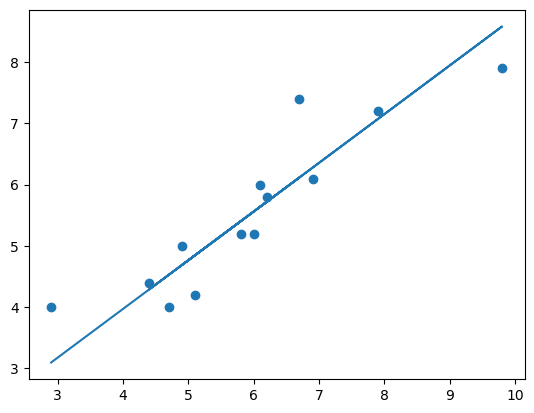

In [68]:
plt.scatter(X,Y)
plt.plot(X,h_x)

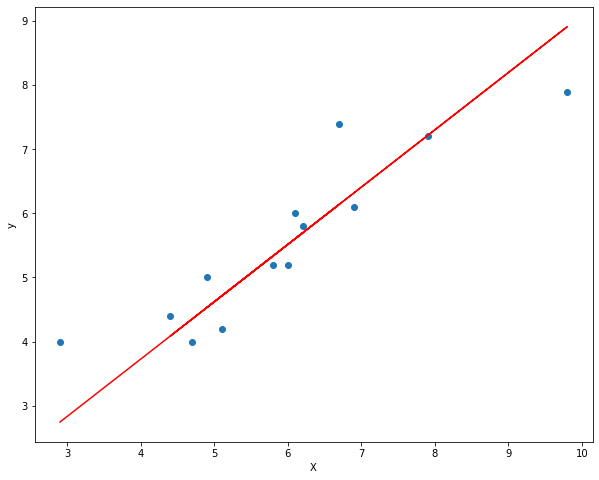

#### Use R2 score to evaluate LR equation output
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [127]:
from sklearn.metrics import r2_score
r2_score(Y,h_x)

0.8026709330593267

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

In [73]:
number_of_iteration=14
theta_0_new=0
theta_1_new=0
lr=.01
loss_array=[]
for i in range(number_of_iteration):
    print(f'****************** Iteration {i} ******************** \n\n')
    h_x=theta_0_new+theta_1_new*X
    error_vector=h_x-Y
    j=np.linalg.norm(error_vector)**2/(2*error_vector.shape[0])
    loss_array.append(j)
    print("error_vector",error_vector)
    print("j",j)
    
    d_theta_0=error_vector.sum()/error_vector.shape[0]
    d_theta_1=(error_vector*X).sum()/error_vector.shape[0]
    print("d_theta_0",theta_0_new)
    print("d_theta_1",theta_1_new)
    gradient_vector=np.array([d_theta_0,d_theta_1])
    print("Gradient Vector Norm:",np.linalg.norm(gradient_vector))
    if np.linalg.norm(gradient_vector)<0.01:
        print("break as gradient vector is almost 0")
        break
    theta_0_new=theta_0_new-lr*d_theta_0
    theta_1_new=theta_1_new-lr*d_theta_1
    
    print("theta_0_new",theta_0_new)
    print("theta_0_new",theta_1_new)
    
    
    

****************** Iteration 0 ******************** 


error_vector [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j 16.305384479692314
d_theta_0 0
d_theta_1 0
Gradient Vector Norm: 35.483622652335995
theta_0_new 0.0556923073976923
theta_0_new 0.35043846043215376
****************** Iteration 1 ******************** 


error_vector [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]
j 6.175608808043304
d_theta_0 0.0556923073976923
d_theta_1 0.35043846043215376
Gradient Vector Norm: 21.611905283072655
theta_0_new 0.08996312489803082
theta_0_new 0.5638229867322322
****************** Iteration 2 ******************** 


error_vector [-2.27495016 -3.53242307 -2.14730419 -2.65583504 -2.28457159 -2.11965812
 -2.47071671 -2.21433466 -1.72709876 -1.23453951 -1.26006895 -1.82921577


In [122]:
#### gradient descent with checker on gradient dexcent only 
theta_0_new=0
theta_1_new=0
lr=.012
loss_array=[]
i=0
while True:
    i+=1
    print(f'****************** Iteration {i} ******************** \n\n')
    h_x=theta_0_new+theta_1_new*X
    error_vector=h_x-Y
    j=np.linalg.norm(error_vector)**2/(2*error_vector.shape[0])
    loss_array.append(j)
    print("error_vector",error_vector)
    print("j",j)
    
    d_theta_0=error_vector.sum()/error_vector.shape[0]
    d_theta_1=(error_vector*X).sum()/error_vector.shape[0]
    print("d_theta_0",theta_0_new)
    print("d_theta_1",theta_1_new)
    gradient_vector=np.array([d_theta_0,d_theta_1])
    gradient_vector_norm=np.linalg.norm(gradient_vector)
    print("Gradient Vector Norm:",gradient_vector_norm)
    if gradient_vector_norm<0.09:
        break
    theta_0_new=theta_0_new-lr*d_theta_0
    theta_1_new=theta_1_new-lr*d_theta_1
    
    print("theta_0_new",theta_0_new)
    print("theta_0_new",theta_1_new)
    
    
    

****************** Iteration 1 ******************** 


error_vector [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j 16.305384479692314
d_theta_0 0
d_theta_1 0
Gradient Vector Norm: 35.483622652335995
theta_0_new 0.06683076887723076
theta_0_new 0.4205261525185845
****************** Iteration 2 ******************** 


error_vector [-2.71364335 -4.51564418 -2.87259104 -3.8110124  -3.71201295 -3.13153864
 -3.36795974 -3.12590736 -2.61001213 -1.9884857  -1.95669639 -2.48285422
 -2.69411728]
j 4.7403174561978325
d_theta_0 0.06683076887723076
d_theta_1 0.4205261525185845
Gradient Vector Norm: 18.83757498373753
theta_0_new 0.10281459230227208
theta_0_new 0.6436946398869805
****************** Iteration 3 ******************** 


error_vector [-2.03047089 -2.98443154 -1.74308161 -2.0119975  -1.48897791 -1.55569224
 -1.97064817 -1.70627895 -1.23501738 -0.81434261 -0.87182072 -1.46492903


****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692318

Gradient Vector:
[[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:
35.483622652336

theta_0_new : 0.0556923073976923
theta_1_new : 0.3504384604321538

****************** Iteration 1 ********************

h(x):[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]

Error Vector:
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j = 6.175608808043303

Gradient Vector:
[[ -3.42708175]
 [-21.33845263]]

Gradient Vector Norm:
21.61190528307266

theta_0_new : 0.08996312489803082
theta_1_new : 0.

### Plot loss vs. iterations

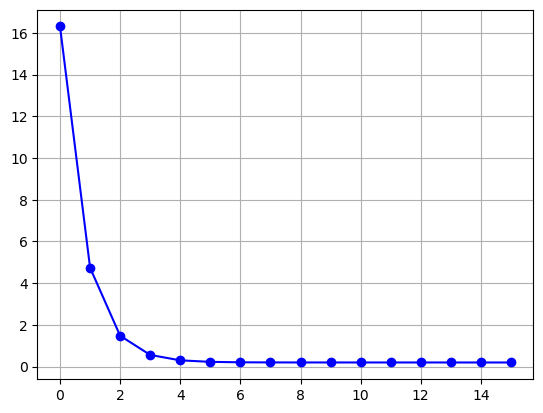

In [123]:
plt.plot(loss_array, marker='o', linestyle='-', color='b')
plt.grid(True)

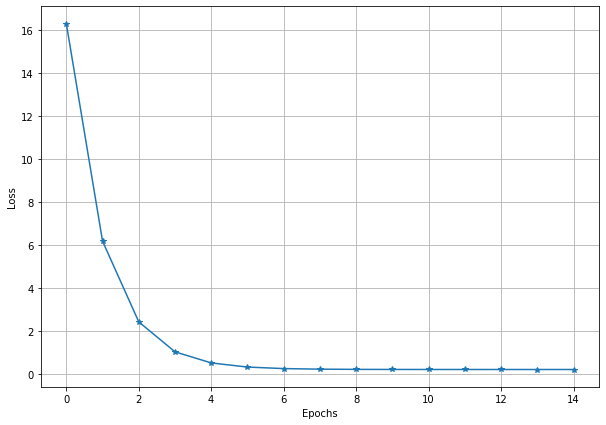

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [128]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [129]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [130]:
data2.shape

(25, 4)

In [131]:
X2,Y2=data2[:,0:3],data2[:,-1:]

In [132]:
X2

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [133]:
Y2

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [134]:
### add 1 value column 
new_column=np.ones(X2.shape[0])
X2= np.c_[ new_column,X2]

In [135]:
X2

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [90]:
X2.shape

(25, 4)

In [136]:
theta=np.array([0,0,0,0]).reshape(4,1)
theta.shape

(4, 1)

In [137]:
h_x=X2@theta
h_x

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [143]:
number_of_iteration=10000
lr=.0001
loss_array=[]
theta=np.array([0,0,0,0]).reshape(4,1)
for i in range(number_of_iteration):
    print(f'****************** Iteration {i} ******************** \n\n')
    h_x=X2@theta
    error_vector=h_x-Y2
    #print(error_vector)
    j=np.linalg.norm(error_vector)**2/(2*error_vector.shape[0])
    loss_array.append(j)
    #print("error_vector",error_vector)
    print("j",j)
    print(X2.shape)
    print(error_vector.shape)
    d_theta = 1/error_vector.shape[0] * (np.dot(X2.T,error_vector).reshape(4,1))
    print("d_theta",d_theta)
    gradient_vector=d_theta
    print("Gradient Vector Norm:",np.linalg.norm(gradient_vector))
    if np.linalg.norm(gradient_vector)<0.1:
        print("break as gradient vector is almost 0")
        break
    theta=theta-lr*d_theta
    print("theta_new",theta)
    
    
    

****************** Iteration 0 ******************** 


j 13405.98
(25, 4)
(25, 1)
d_theta [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
Gradient Vector Norm: 22917.545989219703
theta_new [[0.016204]
 [1.30758 ]
 [1.31472 ]
 [1.346708]]
****************** Iteration 1 ******************** 


j 12348.667642841167
(25, 4)
(25, 1)
d_theta [[  155.55104064]
 [12557.30425376]
 [12626.9593024 ]
 [12908.25503616]]
Gradient Vector Norm: 21994.84565871648
theta_new [[0.0006489 ]
 [0.05184957]
 [0.05202407]
 [0.0558825 ]]
****************** Iteration 2 ******************** 


j 11374.779042807408
(25, 4)
(25, 1)
d_theta [[  -149.25298186]
 [-12043.77704949]
 [-12109.51113768]
 [-12405.12908697]]
Gradient Vector Norm: 21109.29486573152
theta_new [[0.01557419]
 [1.25622728]
 [1.26297518]
 [1.29639541]]
****************** Iteration 3 ******************** 


j 10477.731860896014
(25, 4)
(25, 1)
d_theta [[  143.27934356]
 [11566.81097579]
 [11631.00185216]
 [11889.12756568]]
Gradient Vector Norm

theta_new [[0.0064472 ]
 [0.52761399]
 [0.54925905]
 [0.94172319]]
****************** Iteration 460 ******************** 


j 3.5661555031624976
(25, 4)
(25, 1)
d_theta [[ 0.0557713 ]
 [ 2.20623541]
 [ 1.27298645]
 [-3.38903627]]
Gradient Vector Norm: 4.239887551449449
theta_new [[0.00644162]
 [0.52739336]
 [0.54913175]
 [0.94206209]]
****************** Iteration 461 ******************** 


j 3.5643595271615762
(25, 4)
(25, 1)
d_theta [[ 0.05582381]
 [ 2.20349896]
 [ 1.26925049]
 [-3.38225477]]
Gradient Vector Norm: 4.231922509615496
theta_new [[0.00643604]
 [0.52717301]
 [0.54900483]
 [0.94240031]]
****************** Iteration 462 ******************** 


j 3.562570292263625
(25, 4)
(25, 1)
d_theta [[ 0.05587238]
 [ 2.20045648]
 [ 1.26521287]
 [-3.37580577]]
Gradient Vector Norm: 4.2239742762757215
theta_new [[0.00643045]
 [0.52695297]
 [0.54887831]
 [0.9427379 ]]
****************** Iteration 463 ******************** 


j 3.5607877716085556
(25, 4)
(25, 1)
d_theta [[ 0.05592454]
 [ 2.1

Gradient Vector Norm: 2.038757580100005
theta_new [[0.00382203]
 [0.45739742]
 [0.52062222]
 [1.0379796 ]]
****************** Iteration 871 ******************** 


j 3.1833496390992106
(25, 4)
(25, 1)
d_theta [[ 0.07014628]
 [ 1.29183064]
 [ 0.29388154]
 [-1.54350624]]
Gradient Vector Norm: 2.0353193328277164
theta_new [[0.00381501]
 [0.45726824]
 [0.52059283]
 [1.03813395]]
****************** Iteration 872 ******************** 


j 3.182935735852625
(25, 4)
(25, 1)
d_theta [[ 0.07016936]
 [ 1.29016139]
 [ 0.29259074]
 [-1.54062286]]
Gradient Vector Norm: 2.0318878588258733
theta_new [[0.003808  ]
 [0.45713922]
 [0.52056358]
 [1.03828801]]
****************** Iteration 873 ******************** 


j 3.1825232269821537
(25, 4)
(25, 1)
d_theta [[ 0.07019239]
 [ 1.28849434]
 [ 0.2913036 ]
 [-1.5377452 ]]
Gradient Vector Norm: 2.0284631432541165
theta_new [[0.00380098]
 [0.45701037]
 [0.52053445]
 [1.03844179]]
****************** Iteration 874 ******************** 


j 3.18211210739594
(25, 

d_theta [[ 0.07513837]
 [ 0.90537737]
 [ 0.04954323]
 [-0.92921862]]
Gradient Vector Norm: 1.3004828902686307
theta_new [[0.00180403]
 [0.42728813]
 [0.51632559]
 [1.07146462]]
****************** Iteration 1148 ******************** 


j 3.1080342068898266
(25, 4)
(25, 1)
d_theta [[ 0.07515225]
 [ 0.90421634]
 [ 0.04898139]
 [-0.92754139]]
Gradient Vector Norm: 1.2984557232273706
theta_new [[0.00179651]
 [0.42719771]
 [0.51632069]
 [1.07155737]]
****************** Iteration 1149 ******************** 


j 3.1078657395400158
(25, 4)
(25, 1)
d_theta [[ 0.07516612]
 [ 0.90305683]
 [ 0.04842135]
 [-0.92586741]]
Gradient Vector Norm: 1.2964322803237611
theta_new [[0.001789  ]
 [0.4271074 ]
 [0.51631585]
 [1.07164996]]
****************** Iteration 1150 ******************** 


j 3.1076977968053243
(25, 4)
(25, 1)
d_theta [[ 0.07517995]
 [ 0.90189883]
 [ 0.04786313]
 [-0.92419666]]
Gradient Vector Norm: 1.2944125536863995
theta_new [[0.00178148]
 [0.42701721]
 [0.51631106]
 [1.07174238]]
*******

Gradient Vector Norm: 0.7888978633099596
theta_new [[-7.77727973e-04]
 [ 4.02639065e-01]
 [ 5.16904249e-01]
 [ 1.09488566e+00]]
****************** Iteration 1483 ******************** 


j 3.072553882242053
(25, 4)
(25, 1)
d_theta [[ 0.07864748]
 [ 0.58921464]
 [-0.06175243]
 [-0.51323603]]
Gradient Vector Norm: 0.7877714827716095
theta_new [[-7.85592722e-04]
 [ 4.02580144e-01]
 [ 5.16910425e-01]
 [ 1.09493699e+00]]
****************** Iteration 1484 ******************** 


j 3.0724918681462667
(25, 4)
(25, 1)
d_theta [[ 0.07865512]
 [ 0.58846437]
 [-0.06191217]
 [-0.51235087]]
Gradient Vector Norm: 0.7866469834637281
theta_new [[-7.93458234e-04]
 [ 4.02521298e-01]
 [ 5.16916616e-01]
 [ 1.09498822e+00]]
****************** Iteration 1485 ******************** 


j 3.07243003095664
(25, 4)
(25, 1)
d_theta [[ 0.07866275]
 [ 0.58771507]
 [-0.06207118]
 [-0.51146736]]
Gradient Vector Norm: 0.785524361724497
theta_new [[-8.01324508e-04]
 [ 4.02462526e-01]
 [ 5.16922823e-01]
 [ 1.09503937e+00]]


Gradient Vector Norm: 0.5312758132368408
theta_new [[-0.00305364]
 [ 0.38850389]
 [ 0.51909096]
 [ 1.10651361]]
****************** Iteration 1769 ******************** 


j 3.060330228893564
(25, 4)
(25, 1)
d_theta [[ 0.08037175]
 [ 0.40962469]
 [-0.08463242]
 [-0.31636205]]
Gradient Vector Norm: 0.5305653530804694
theta_new [[-0.00306167]
 [ 0.38846292]
 [ 0.51909942]
 [ 1.10654524]]
****************** Iteration 1770 ******************** 


j 3.060302097753157
(25, 4)
(25, 1)
d_theta [[ 0.08037642]
 [ 0.40910546]
 [-0.08465219]
 [-0.31583816]]
Gradient Vector Norm: 0.5298559986618862
theta_new [[-0.00306971]
 [ 0.38842201]
 [ 0.51910789]
 [ 1.10657683]]
****************** Iteration 1771 ******************** 


j 3.0602740417798024
(25, 4)
(25, 1)
d_theta [[ 0.08038108]
 [ 0.40858689]
 [-0.08467165]
 [-0.31531522]]
Gradient Vector Norm: 0.529147748032599
theta_new [[-0.00307775]
 [ 0.38838116]
 [ 0.51911636]
 [ 1.10660836]]
****************** Iteration 1772 ******************** 


j 3.0

d_theta [[ 0.08139586]
 [ 0.28954444]
 [-0.0815678 ]
 [-0.20266798]]
Gradient Vector Norm: 0.37173766028330685
theta_new [[-0.00527902]
 [ 0.37898616]
 [ 0.52140923]
 [ 1.11352487]]
****************** Iteration 2044 ******************** 


j 3.0548137135699367
(25, 4)
(25, 1)
d_theta [[ 0.0813988 ]
 [ 0.28917865]
 [-0.08153425]
 [-0.20234531]]
Gradient Vector Norm: 0.371270136058396
theta_new [[-0.00528716]
 [ 0.37895724]
 [ 0.52141738]
 [ 1.1135451 ]]
****************** Iteration 2045 ******************** 


j 3.0547999380849817
(25, 4)
(25, 1)
d_theta [[ 0.08140174]
 [ 0.28881332]
 [-0.08150059]
 [-0.20202319]]
Gradient Vector Norm: 0.37080330989303506
theta_new [[-0.0052953 ]
 [ 0.37892836]
 [ 0.52142553]
 [ 1.1135653 ]]
****************** Iteration 2046 ******************** 


j 3.0547861972181356
(25, 4)
(25, 1)
d_theta [[ 0.08140467]
 [ 0.28844846]
 [-0.08146682]
 [-0.20170164]]
Gradient Vector Norm: 0.3703371806832061
theta_new [[-0.00530344]
 [ 0.37889952]
 [ 0.52143368]
 [ 1.1

Gradient Vector Norm: 0.28328059692594687
theta_new [[-0.00709247]
 [ 0.37338445]
 [ 0.52312125]
 [ 1.11731779]]
****************** Iteration 2266 ******************** 


j 3.0524575374283938
(25, 4)
(25, 1)
d_theta [[ 0.08194409]
 [ 0.21848565]
 [-0.07212051]
 [-0.14284738]]
Gradient Vector Norm: 0.2829444400537777
theta_new [[-0.00710066]
 [ 0.3733626 ]
 [ 0.52312846]
 [ 1.11733207]]
****************** Iteration 2267 ******************** 


j 3.05244953642176
(25, 4)
(25, 1)
d_theta [[ 0.08194612]
 [ 0.21821023]
 [-0.07207214]
 [-0.14262699]]
Gradient Vector Norm: 0.28260878173277776
theta_new [[-0.00710886]
 [ 0.37334078]
 [ 0.52313566]
 [ 1.11734633]]
****************** Iteration 2268 ******************** 


j 3.0524415543857293
(25, 4)
(25, 1)
d_theta [[ 0.08194815]
 [ 0.21793515]
 [-0.07202374]
 [-0.14240698]]
Gradient Vector Norm: 0.2822736212391789
theta_new [[-0.00711705]
 [ 0.37331898]
 [ 0.52314287]
 [ 1.11736057]]
****************** Iteration 2269 ******************** 


j 

Gradient Vector Norm: 0.22385504439674864
theta_new [[-0.00877612]
 [ 0.36943499]
 [ 0.52449564]
 [ 1.11983331]]
****************** Iteration 2471 ******************** 


j 3.0511513866108864
(25, 4)
(25, 1)
d_theta [[ 0.08229698]
 [ 0.16873816]
 [-0.06183911]
 [-0.10455111]]
Gradient Vector Norm: 0.2236076215646808
theta_new [[-0.00878435]
 [ 0.36941811]
 [ 0.52450182]
 [ 1.11984377]]
****************** Iteration 2472 ******************** 


j 3.051146389336413
(25, 4)
(25, 1)
d_theta [[ 0.08229843]
 [ 0.16852579]
 [-0.06178841]
 [-0.10439428]]
Gradient Vector Norm: 0.22336057262658157
theta_new [[-0.00879258]
 [ 0.36940126]
 [ 0.524508  ]
 [ 1.11985421]]
****************** Iteration 2473 ******************** 


j 3.0511414030970485
(25, 4)
(25, 1)
d_theta [[ 0.08229987]
 [ 0.16831369]
 [-0.06173771]
 [-0.10423771]]
Gradient Vector Norm: 0.2231138970744818
theta_new [[-0.00880081]
 [ 0.36938443]
 [ 0.52451418]
 [ 1.11986463]]
****************** Iteration 2474 ******************** 


j

j 3.05033816567445
(25, 4)
(25, 1)
d_theta [[ 0.08254258]
 [ 0.13118991]
 [-0.0519342 ]
 [-0.0777416 ]]
Gradient Vector Norm: 0.18101101240168485
theta_new [[-0.0104329 ]
 [ 0.36643653]
 [ 0.52563807]
 [ 1.12165095]]
****************** Iteration 2672 ******************** 


j 3.050334890818648
(25, 4)
(25, 1)
d_theta [[ 0.08254361]
 [ 0.13102502]
 [-0.05188644]
 [-0.07762802]]
Gradient Vector Norm: 0.18082951939705288
theta_new [[-0.01044115]
 [ 0.36642342]
 [ 0.52564326]
 [ 1.12165872]]
****************** Iteration 2673 ******************** 


j 3.0503316225257424
(25, 4)
(25, 1)
d_theta [[ 0.08254464]
 [ 0.13086033]
 [-0.0518387 ]
 [-0.07751463]]
Gradient Vector Norm: 0.18064831253041172
theta_new [[-0.01044941]
 [ 0.36641034]
 [ 0.52564844]
 [ 1.12166647]]
****************** Iteration 2674 ******************** 


j 3.0503283607788494
(25, 4)
(25, 1)
d_theta [[ 0.08254567]
 [ 0.13069585]
 [-0.05179098]
 [-0.07740142]]
Gradient Vector Norm: 0.18046739142681978
theta_new [[-0.01045766]

Gradient Vector Norm: 0.14413711147604352
theta_new [[-0.01246619]
 [ 0.36366233]
 [ 0.52677675]
 [ 1.12325884]]
****************** Iteration 2918 ******************** 


j 3.049692645385048
(25, 4)
(25, 1)
d_theta [[ 0.08275067]
 [ 0.09617813]
 [-0.04091767]
 [-0.05448299]]
Gradient Vector Norm: 0.14401582336008045
theta_new [[-0.01247446]
 [ 0.36365271]
 [ 0.52678084]
 [ 1.12326429]]
****************** Iteration 2919 ******************** 


j 3.0496905722013925
(25, 4)
(25, 1)
d_theta [[ 0.08275134]
 [ 0.0960574 ]
 [-0.04087656]
 [-0.05440585]]
Gradient Vector Norm: 0.14389474222767545
theta_new [[-0.01248274]
 [ 0.36364311]
 [ 0.52678493]
 [ 1.12326973]]
****************** Iteration 2920 ******************** 


j 3.0496885025015406
(25, 4)
(25, 1)
d_theta [[ 0.08275201]
 [ 0.09593682]
 [-0.04083548]
 [-0.05432881]]
Gradient Vector Norm: 0.1437738678014384
theta_new [[-0.01249101]
 [ 0.36363351]
 [ 0.52678901]
 [ 1.12327517]]
****************** Iteration 2921 ******************** 




d_theta [[ 0.08287321]
 [ 0.07296649]
 [-0.03259921]
 [-0.04005488]]
Gradient Vector Norm: 0.12189823209935455
theta_new [[-0.01429642]
 [ 0.36180506]
 [ 0.52758643]
 [ 1.12429466]]
****************** Iteration 3139 ******************** 


j 3.049305409130289
(25, 4)
(25, 1)
d_theta [[ 0.08287366]
 [ 0.07287498]
 [-0.03256473]
 [-0.03999965]]
Gradient Vector Norm: 0.1218164176487879
theta_new [[-0.01430471]
 [ 0.36179777]
 [ 0.52758968]
 [ 1.12429866]]
****************** Iteration 3140 ******************** 


j 3.049303925703863
(25, 4)
(25, 1)
d_theta [[ 0.08287411]
 [ 0.07278359]
 [-0.03253028]
 [-0.0399445 ]]
Gradient Vector Norm: 0.12173475517737763
theta_new [[-0.014313  ]
 [ 0.36179049]
 [ 0.52759294]
 [ 1.12430266]]
****************** Iteration 3141 ******************** 


j 3.0493024442650905
(25, 4)
(25, 1)
d_theta [[ 0.08287456]
 [ 0.07269231]
 [-0.03249586]
 [-0.03988943]]
Gradient Vector Norm: 0.12165324446179678
theta_new [[-0.01432128]
 [ 0.36178322]
 [ 0.52759619]
 [ 1.1

d_theta [[ 0.0829513 ]
 [ 0.05599803]
 [-0.02596923]
 [-0.03004373]]
Gradient Vector Norm: 0.10767415313597568
theta_new [[-0.01604593]
 [ 0.36045324]
 [ 0.52820174]
 [ 1.12502821]]
****************** Iteration 3350 ******************** 


j 3.0490296186078103
(25, 4)
(25, 1)
d_theta [[ 0.08295159]
 [ 0.05592785]
 [-0.0259408 ]
 [-0.03000331]]
Gradient Vector Norm: 0.10761977111252313
theta_new [[-0.01605423]
 [ 0.36044765]
 [ 0.52820434]
 [ 1.12503121]]
****************** Iteration 3351 ******************** 


j 3.049028460698443
(25, 4)
(25, 1)
d_theta [[ 0.08295189]
 [ 0.05585776]
 [-0.0259124 ]
 [-0.02996295]]
Gradient Vector Norm: 0.10756549839112334
theta_new [[-0.01606252]
 [ 0.36044206]
 [ 0.52820693]
 [ 1.12503421]]
****************** Iteration 3352 ******************** 


j 3.049027303956224
(25, 4)
(25, 1)
d_theta [[ 0.08295218]
 [ 0.05578776]
 [-0.02588403]
 [-0.02992265]]
Gradient Vector Norm: 0.10751133479020636
theta_new [[-0.01607082]
 [ 0.36043648]
 [ 0.52820952]
 [ 1.

#### Predict y values using the LR equation
##### X@thetas

In [144]:
h_x=X2@theta
print("h(x) = y_predict:",h_x)

h(x) = y_predict: [[152.93271151]
 [184.61231886]
 [181.38322157]
 [198.85544308]
 [139.90499943]
 [105.25867203]
 [150.57363082]
 [114.01431493]
 [174.32084699]
 [164.43562114]
 [143.95734843]
 [142.79946086]
 [186.06153677]
 [152.83944858]
 [151.53012506]
 [188.51733974]
 [144.20948104]
 [181.35413506]
 [177.0503019 ]
 [158.56752095]
 [176.22294238]
 [174.42154366]
 [167.57132207]
 [151.09544099]
 [190.5850901 ]]


In [114]:
print(Y2.shape)

(25, 1)


h(x) = y_predict:
[[152.93271151]
 [184.61231886]
 [181.38322157]
 [198.85544308]
 [139.90499943]
 [105.25867203]
 [150.57363082]
 [114.01431493]
 [174.32084699]
 [164.43562114]
 [143.95734843]
 [142.79946086]
 [186.06153677]
 [152.83944858]
 [151.53012506]
 [188.51733974]
 [144.20948104]
 [181.35413506]
 [177.0503019 ]
 [158.56752095]
 [176.22294238]
 [174.42154366]
 [167.57132207]
 [151.09544099]
 [190.5850901 ]]

y:
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]



### Plot loss vs. iterations

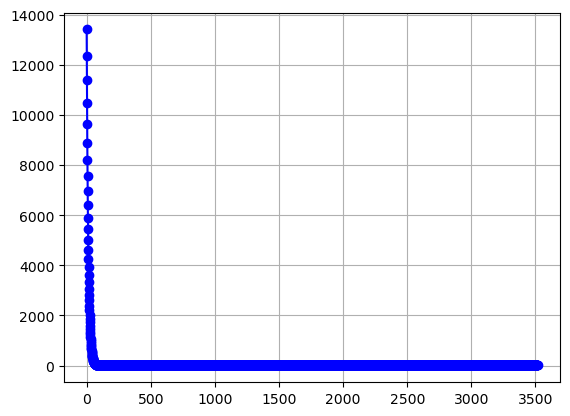

In [145]:
plt.plot(loss_array, marker='o', linestyle='-', color='b')
plt.grid(True)

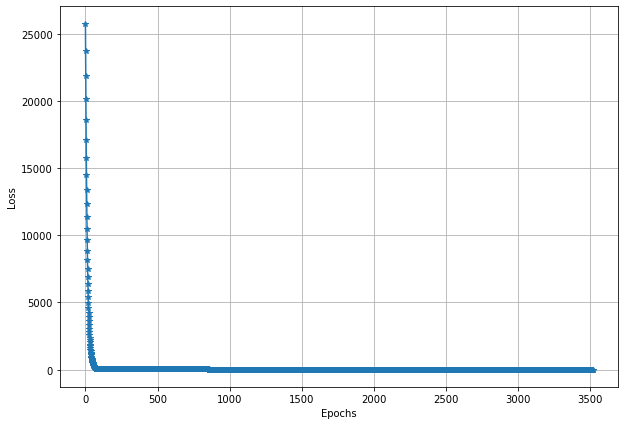

#### Use R2 score to evaluate LR equation output

In [146]:
r2_score(Y2,h_x)

0.9890131164245574